In [1]:
library(Seurat)
library(dplyr)
library(patchwork)
library(ggplot2)
library(reticulate)
library(trqwe)
library(data.table)
setwd("/rds/general/user/emacdona/projects/covid19-transcriptome/live/sc_rnaseq/prep_DEG_files/")

Attaching SeuratObject

Attaching sp


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last




In [2]:
data<-mcreadRDS("../annotation/df_TNK_for_downstream_new.rds",mc.core=4)

In [3]:
data

An object of class Seurat 
33696 features across 403001 samples within 2 assays 
Active assay: RNA (33559 features, 1896 variable features)
 1 other assay present: ADT
 8 dimensional reductions calculated: pca_RNA, umapBeforeHarmony_RNA, harmony_RNA, umapAfterHarmony_RNA, pca, harmony, umap_harmony_30, umap_harmony_new

In [4]:
# remove doublets
data<-subset(data,subset= merged_souporcell_status=="singlet" & level_1!= "doublets")
data

An object of class Seurat 
33696 features across 403001 samples within 2 assays 
Active assay: RNA (33559 features, 1896 variable features)
 1 other assay present: ADT
 8 dimensional reductions calculated: pca_RNA, umapBeforeHarmony_RNA, harmony_RNA, umapAfterHarmony_RNA, pca, harmony, umap_harmony_30, umap_harmony_new

In [5]:
# remove the unannotated samples
data<-subset(data,subset= sample_id!="NA" & patient_id!="unresolved" & case_control!="NA")
data

An object of class Seurat 
33696 features across 403001 samples within 2 assays 
Active assay: RNA (33559 features, 1896 variable features)
 1 other assay present: ADT
 8 dimensional reductions calculated: pca_RNA, umapBeforeHarmony_RNA, harmony_RNA, umapAfterHarmony_RNA, pca, harmony, umap_harmony_30, umap_harmony_new

In [6]:
names(data@meta.data)

[1] "orig.ident"                         
  [2] "nCount_RNA"                         
  [3] "nFeature_RNA"                       
  [4] "nCount_ADT"                         
  [5] "nFeature_ADT"                       
  [6] "nCount_ADT_raw"                     
  [7] "nFeature_ADT_raw"                   
  [8] "nCount_RNA_raw"                     
  [9] "nFeature_RNA_raw"                   
 [10] "soupxOnAdt"                         
 [11] "soupxOnRna"                         
 [12] "percentMito"                        
 [13] "exclude"                            
 [14] "centre"                             
 [15] "pool"                               
 [16] "tcrId"                              
 [17] "bcrId"                              
 [18] "celltypist_broad_predLabel"         
 [19] "celltypist_broad_maxPredProb"       
 [20] "haniffa_broad_predLabel"            
 [21] "haniffa_broad_maxPredProb"          
 [22] "yoshida_broad_predLabel"            
 [23] "yoshida_broad_maxPredProb"          
 [24] "celltypist_detailed_predLabel"      
 [25] "celltypist_detailed_maxPredProb"    
 [26] "yoshida_detailed_predLabel"         
 [27] "yoshida_detailed_maxPredProb"       
 [28] "seurat_clusters"                    
 [29] "RNA_sequencing_saturation"          
 [30] "pool_factor"                        
 [31] "RNA_readsConfidentlyOnTranscriptome"
 [32] "RNA_readsConfidentlyOnGenome"       
 [33] "RNA_readsOnGenome"                  
 [34] "RNA_Q30readsBarcode"                
 [35] "RNA_Q30readsRead"                   
 [36] "RNA_Q30readsUmi"                    
 [37] "rna_snn_res.4"                      
 [38] "rna_snn_res.0.5"                    
 [39] "rna_snn_res.0.1"                    
 [40] "harmony_snn_res.4"                  
 [41] "yoshida_broad_predLabel_majorVote"  
 [42] "harmony_snn_res.0.5"                
 [43] "harmony_snn_res.0.1"                
 [44] "cell_type_compartment"              
 [45] "pool_number"                        
 [46] "merged_souporcell_cluster"          
 [47] "merged_souporcell_status"           
 [48] "patient_id"                         
 [49] "sample_id"                          
 [50] "multi_chain_bcr"                    
 [51] "IR_VJ_1_locus_bcr"                  
 [52] "IR_VJ_2_locus_bcr"                  
 [53] "IR_VDJ_1_locus_bcr"                 
 [54] "IR_VDJ_2_locus_bcr"                 
 [55] "IR_VJ_1_cdr3_bcr"                   
 [56] "IR_VJ_2_cdr3_bcr"                   
 [57] "IR_VDJ_1_cdr3_bcr"                  
 [58] "IR_VDJ_2_cdr3_bcr"                  
 [59] "IR_VJ_1_cdr3_nt_bcr"                
 [60] "IR_VJ_2_cdr3_nt_bcr"                
 [61] "IR_VDJ_1_cdr3_nt_bcr"               
 [62] "IR_VDJ_2_cdr3_nt_bcr"               
 [63] "IR_VJ_1_expr_bcr"                   
 [64] "IR_VJ_2_expr_bcr"                   
 [65] "IR_VDJ_1_expr_bcr"                  
 [66] "IR_VDJ_2_expr_bcr"                  
 [67] "IR_VJ_1_expr_raw_bcr"               
 [68] "IR_VJ_2_expr_raw_bcr"               
 [69] "IR_VDJ_1_expr_raw_bcr"              
 [70] "IR_VDJ_2_expr_raw_bcr"              
 [71] "IR_VJ_1_v_gene_bcr"                 
 [72] "IR_VJ_2_v_gene_bcr"                 
 [73] "IR_VDJ_1_v_gene_bcr"                
 [74] "IR_VDJ_2_v_gene_bcr"                
 [75] "IR_VJ_1_d_gene_bcr"                 
 [76] "IR_VJ_2_d_gene_bcr"                 
 [77] "IR_VDJ_1_d_gene_bcr"                
 [78] "IR_VDJ_2_d_gene_bcr"                
 [79] "IR_VJ_1_j_gene_bcr"                 
 [80] "IR_VJ_2_j_gene_bcr"                 
 [81] "IR_VDJ_1_j_gene_bcr"                
 [82] "IR_VDJ_2_j_gene_bcr"                
 [83] "IR_VJ_1_c_gene_bcr"                 
 [84] "IR_VJ_2_c_gene_bcr"                 
 [85] "IR_VDJ_1_c_gene_bcr"                
 [86] "IR_VDJ_2_c_gene_bcr"                
 [87] "IR_VJ_1_junction_ins_bcr"           
 [88] "IR_VJ_2_junction_ins_bcr"           
 [89] "IR_VDJ_1_junction_ins_bcr"          
 [90] "IR_VDJ_2_junction_ins_bcr"          
 [91] "has_ir_bcr"                        

In [7]:
#need to change the name
names(data@meta.data)<-gsub("patient_id","individual_id",names(data@meta.data))

In [9]:
##############a#
# Add new ethniacity
###############

In [10]:
eth<-fread("../raw_data/estimated_ethnicity.txt",data.table=FALSE)


head(eth)
dim(eth)
names(eth)[2]<-"new_ethnicity"
names(eth)[1]<-"individual_id"

,patient_id,ethnicity,corrected_ethnicity,PC1_nonafricanVsAfrican,PC2_asianVsEuropean
,<chr>,<chr>,<chr>,<dbl>,<dbl>
1,C103,asian,European,8.366688,-5.166119
2,C116,white,European,14.181269,-22.922029
3,C123,asian,Asian,6.961038,12.203095
4,C214,white,European,-4.285705,-11.177220
5,C40,black,African,-81.661885,-14.729245
6,C42,white,European,9.102418,-7.881571


[1] 63  5

In [11]:
x<-data@meta.data


In [12]:
x<-left_join(x,eth,by="individual_id")

In [13]:
rownames(x)<-rownames(data@meta.data)

In [14]:
unique(rownames(x)==rownames(data@meta.data))

[1] TRUE

In [15]:
data<-AddMetaData(data,x)

In [16]:
length(unique(rownames(x)))

[1] 403001

In [17]:
length(unique(rownames(data@meta.data)))

[1] 403001

In [18]:
#sort annotation

In [19]:
data$level_2[data$level_2%in%c("T CD8 EM","T CD8 CM")] <- "T CD8 Mem"
data$level_3[data$level_3=="T CD8 EM IFN stim"] <- "T CD8 Mem IFN stim"
data$level_3[data$level_3=="T CD8 CM"] <- "T CD8 Mem"

In [20]:
unique(data$level_1)
unique(data$level_2)
unique(data$level_3)

[1] "T reg"  "T CD4+" "NK"     "T CD8+" "MAIT"   "T g/d"

[1] "T reg"          "T CD4 Naive"    "NK"             "T CD4 Helper"  
 [5] "T CD8 CTL"      "T CD4 CTL"      "NK CD56 bright" "T CD8 Naive"   
 [9] "MAIT"           "T g/d"          "NKT"            "T CD8 Mem"     
[13] "T CD4 cycling"  "T CD8 EMRA"     "ILC"

[1] "T reg"                 "T CD4 Naive"           "NK"                   
 [4] "T CD4 Helper"          "T CD8 CTL IFN stim"    "T CD8 CTL"            
 [7] "T reg IFN stim"        "T CD4 CTL"             "NK IFN stim"          
[10] "NK CD56 bright"        "T CD8 Naive IFN stim"  "MAIT"                 
[13] "T g/d"                 "T CD4 Helper IFN stim" "T CD8 Naive"          
[16] "NKT"                   "T CD8 Mem"             "T CD8 Mem IFN stim"   
[19] "T CD4 cycling"         "T CD4 Naive IFN stim"  "T CD8 EMRA"           
[22] "ILC"

In [21]:
data

An object of class Seurat 
33696 features across 403001 samples within 2 assays 
Active assay: RNA (33559 features, 1896 variable features)
 1 other assay present: ADT
 8 dimensional reductions calculated: pca_RNA, umapBeforeHarmony_RNA, harmony_RNA, umapAfterHarmony_RNA, pca, harmony, umap_harmony_30, umap_harmony_new

In [22]:
###################
# UMAPs
##################

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



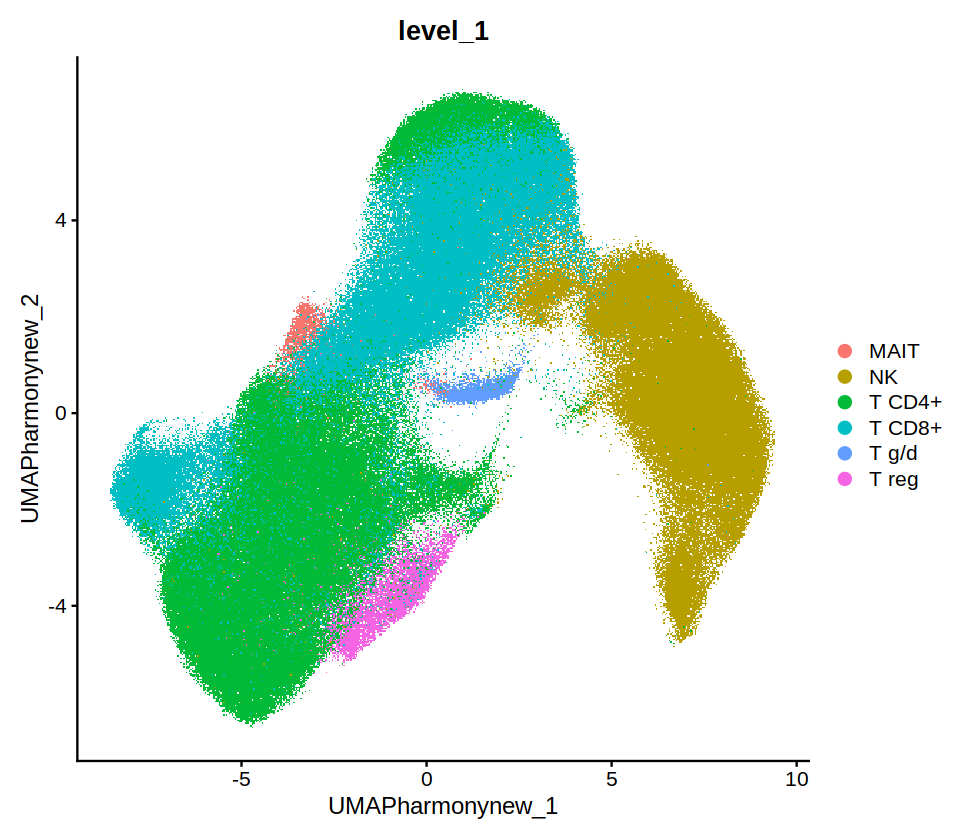

In [23]:
options(repr.plot.width=8, repr.plot.height=7)
DimPlot(object = data, label = FALSE,reduction = "umap_harmony_new",group.by="level_1")
ggsave("UMAP_level_1.pdf")

In [24]:
cols<-c("ILC"="#FFF7BC",
        "MAIT"="#FEE391",
        "NK"="#FEC44F",
        "NK CD56 bright"="#FE9929",
        "NKT"="#EC7014",
        "T CD4 CTL"="#CC4C02",
        "T CD4 Helper"="#993404",
        "T CD4 Naive"="#662506",
        "T CD4 cycling"="#FCBBA1",
        "T CD8 CTL"="#FC9272",
        "T CD8 EMRA"="#FB6A4A",
        "T CD8 Mem"="#EF3B2C",
        "T CD8 Naive"="#CB181D",
        "T g/d"="#A50F15",
        "T reg"="#67000D")

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



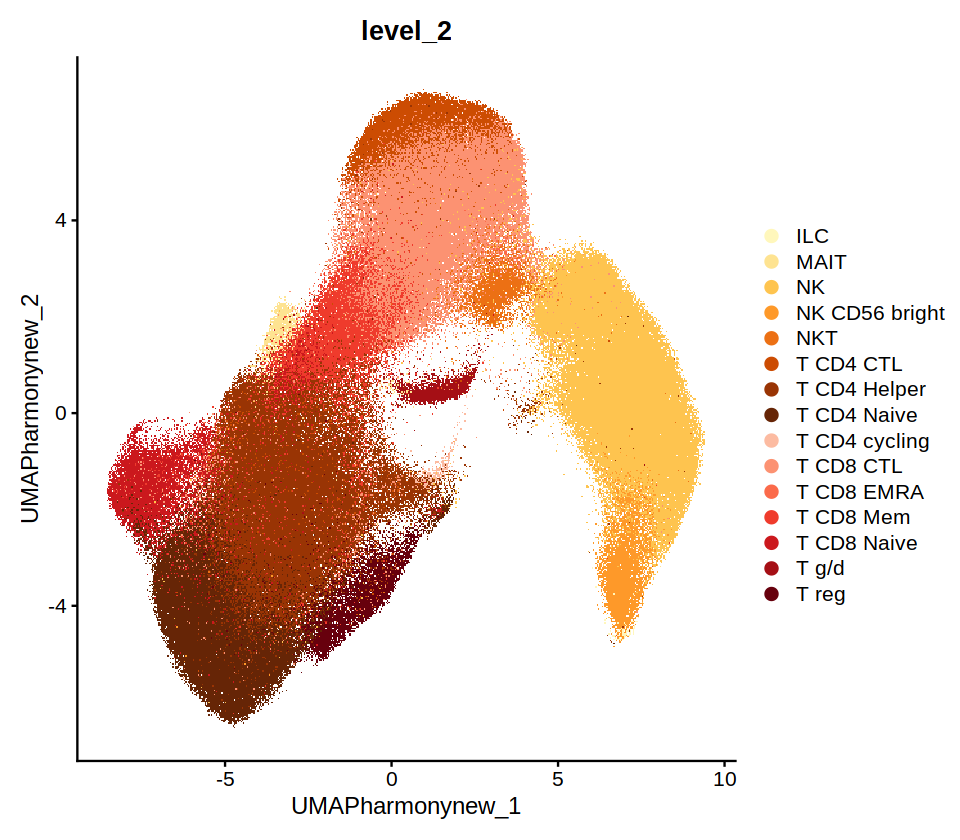

In [25]:
DimPlot(object = data, label = FALSE,reduction = "umap_harmony_new",group.by="level_2",cols=cols)

In [27]:
getwd()

[1] "/rds/general/project/covid19-transcriptome/live/sc_rnaseq/prep_DEG_files"

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Saving 6.67 x 6.67 in image



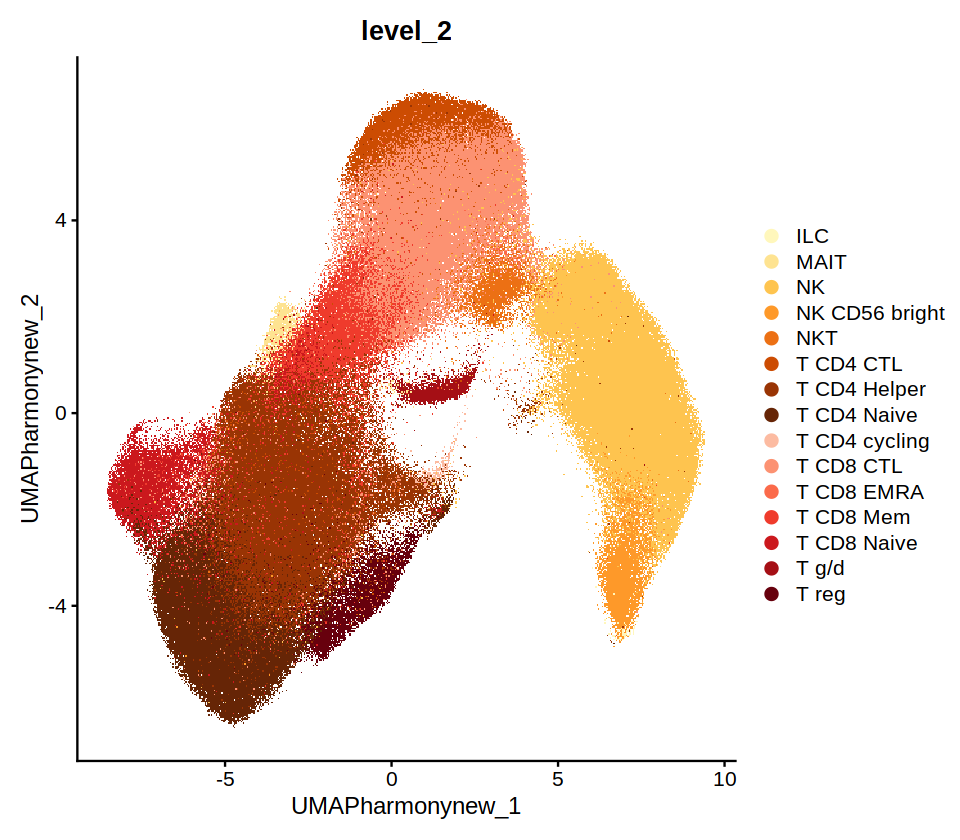

In [26]:
options(repr.plot.width=8, repr.plot.height=7)
DimPlot(object = data, label = FALSE,reduction = "umap_harmony_new",group.by="level_2",cols=cols)
ggsave("UMAP_level_2.pdf")

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



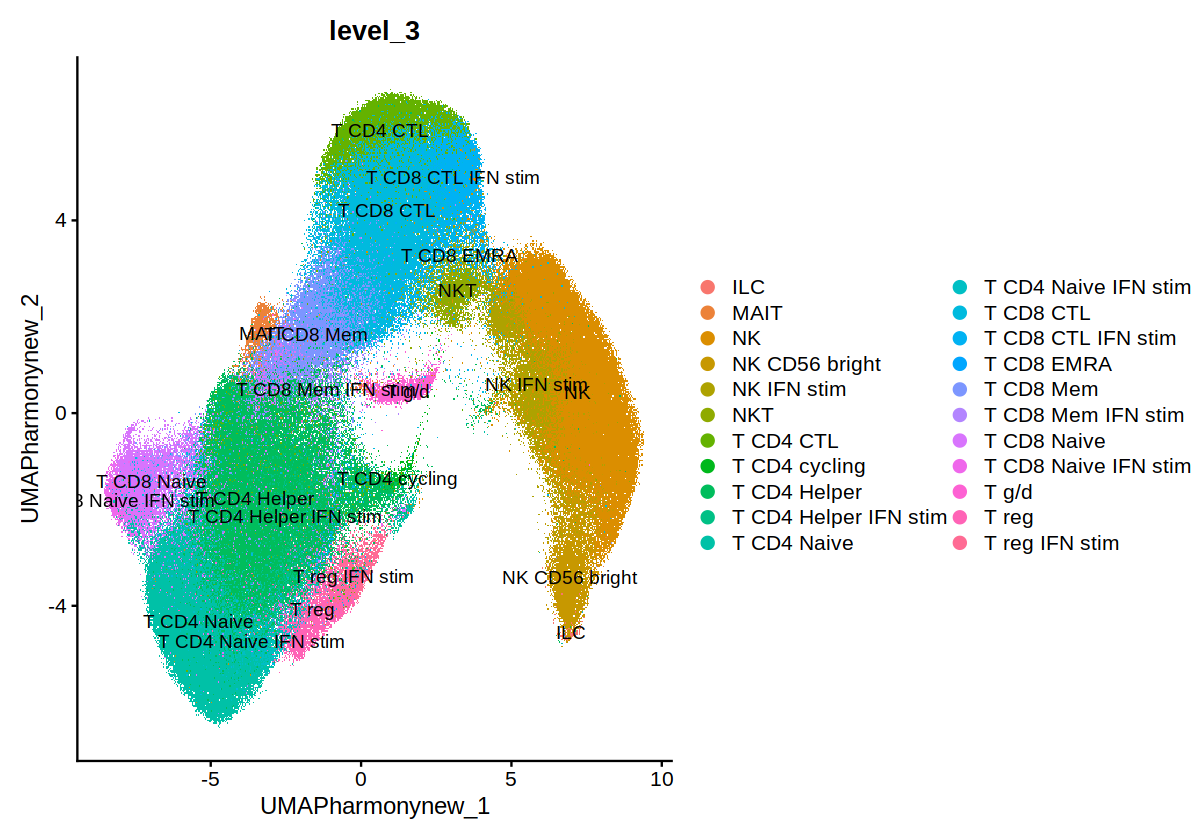

In [24]:
options(repr.plot.width=10, repr.plot.height=7)
DimPlot(object = data, label = TRUE,reduction = "umap_harmony_new",group.by="level_3")


Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



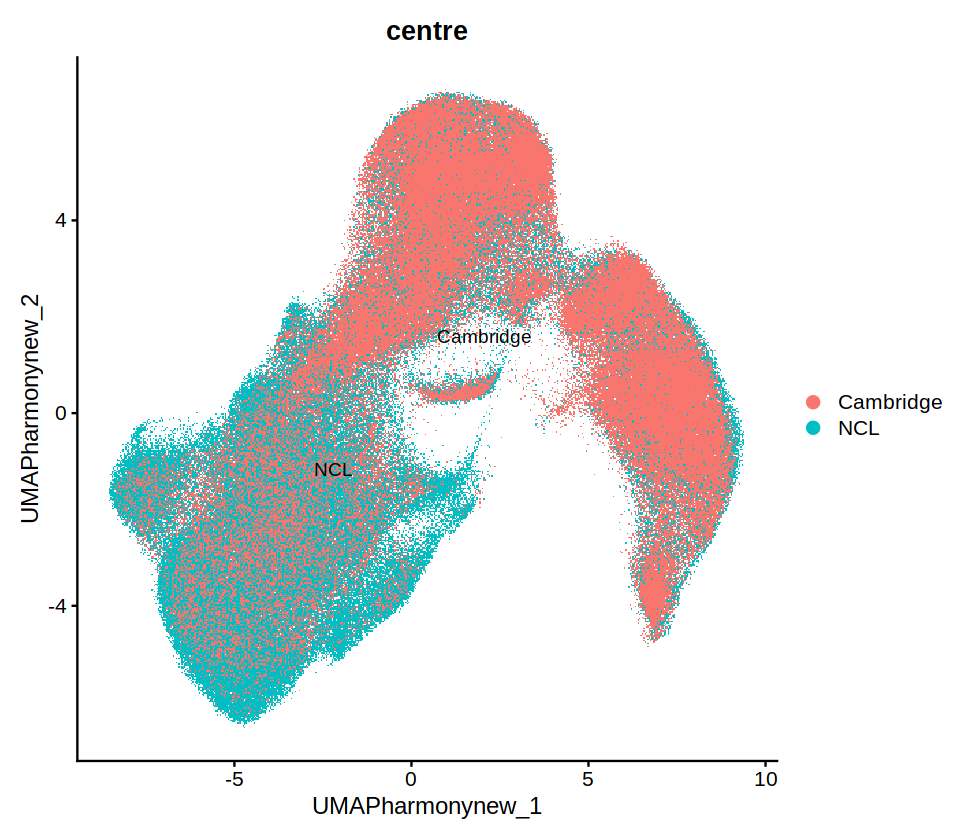

In [25]:
options(repr.plot.width=8, repr.plot.height=7)
DimPlot(object = data, label = TRUE,reduction = "umap_harmony_new",group.by="centre")


Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



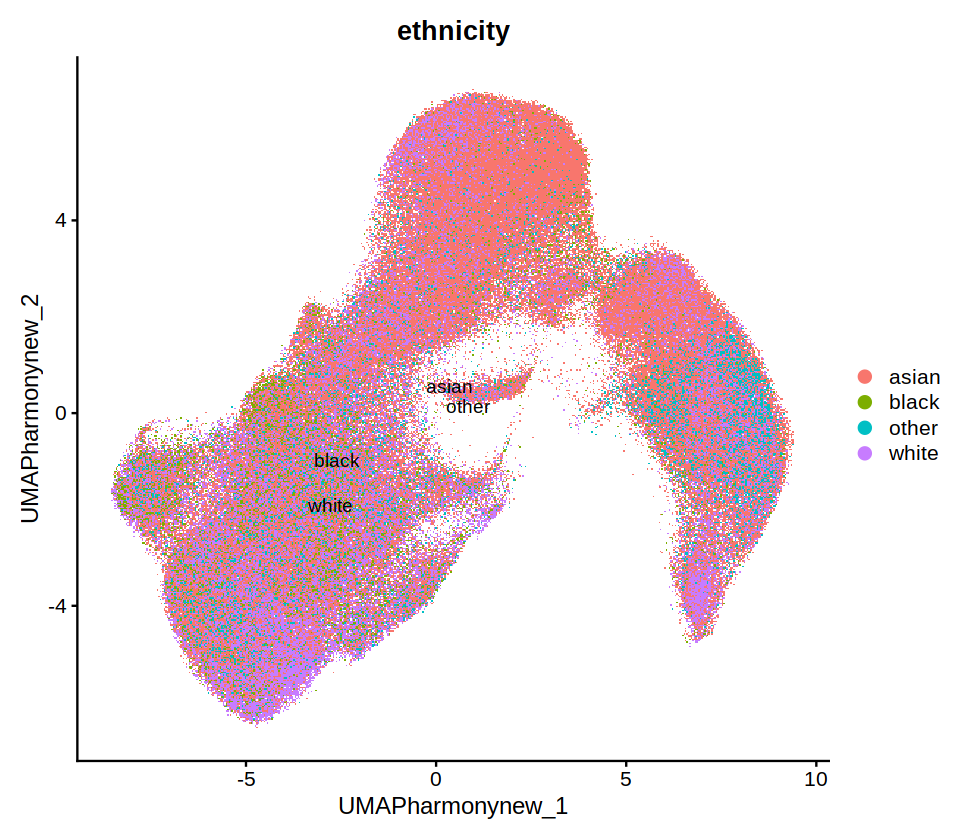

In [26]:
options(repr.plot.width=8, repr.plot.height=7)
DimPlot(object = data, label = TRUE,reduction = "umap_harmony_new",group.by="ethnicity")


Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



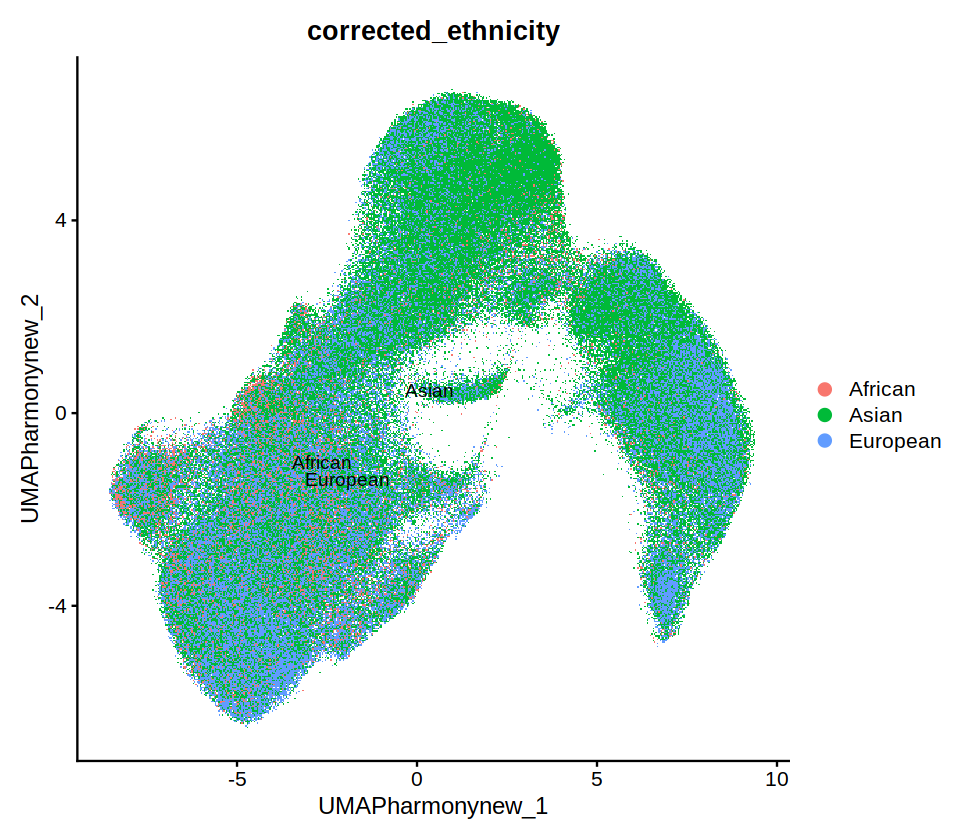

In [27]:
options(repr.plot.width=8, repr.plot.height=7)
DimPlot(object = data, label = TRUE,reduction = "umap_harmony_new",group.by="corrected_ethnicity")


Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



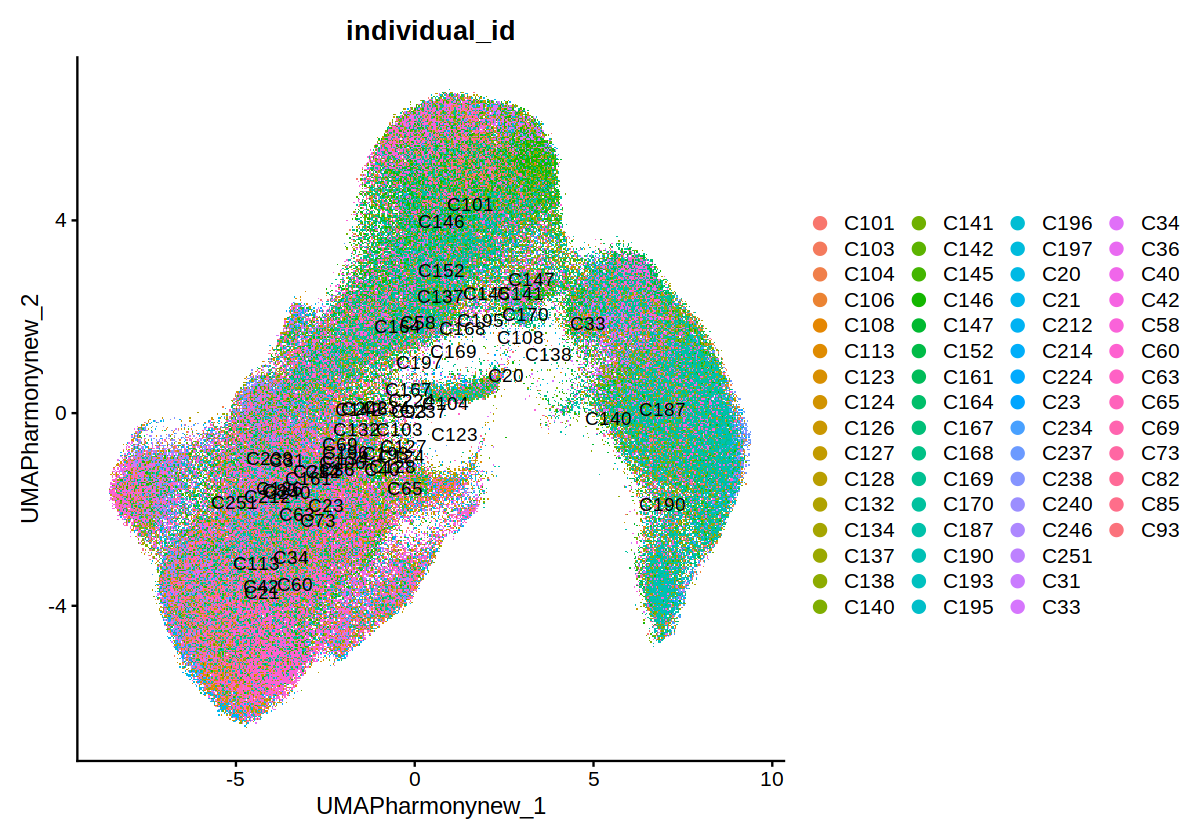

In [28]:
options(repr.plot.width=10, repr.plot.height=7)
DimPlot(object = data, label = TRUE,reduction = "umap_harmony_new",group.by="individual_id")


Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



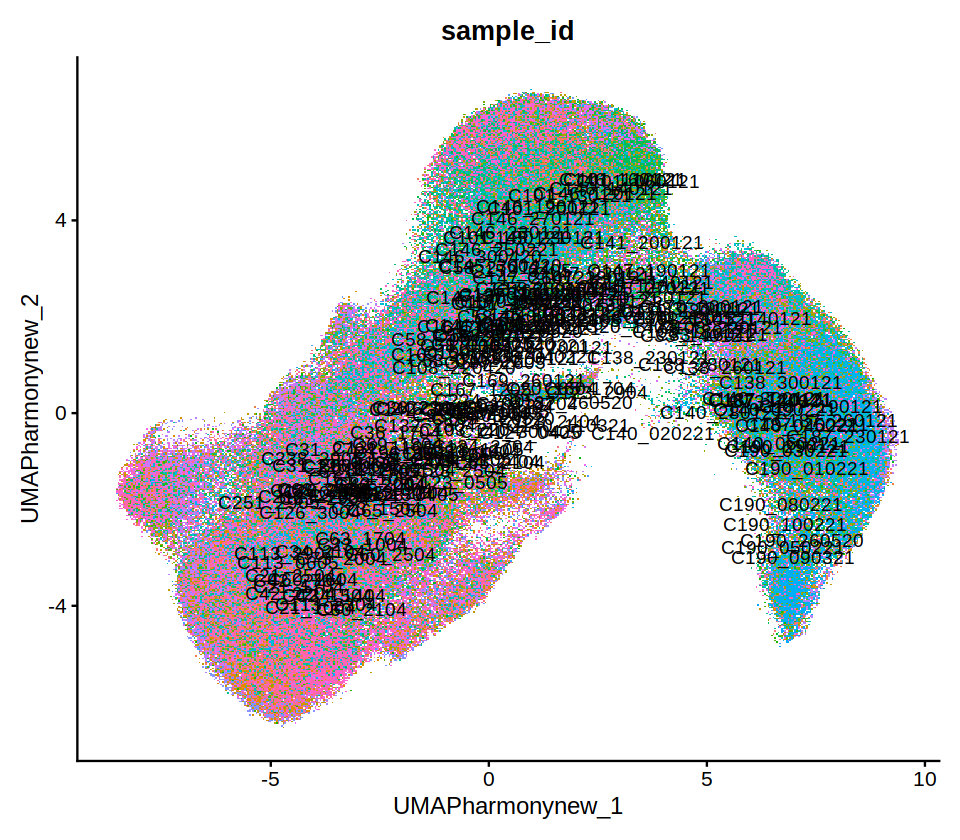

In [29]:
options(repr.plot.width=8, repr.plot.height=7)
DimPlot(object = data, label = TRUE,reduction = "umap_harmony_new",group.by="sample_id")+ NoLegend()


Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



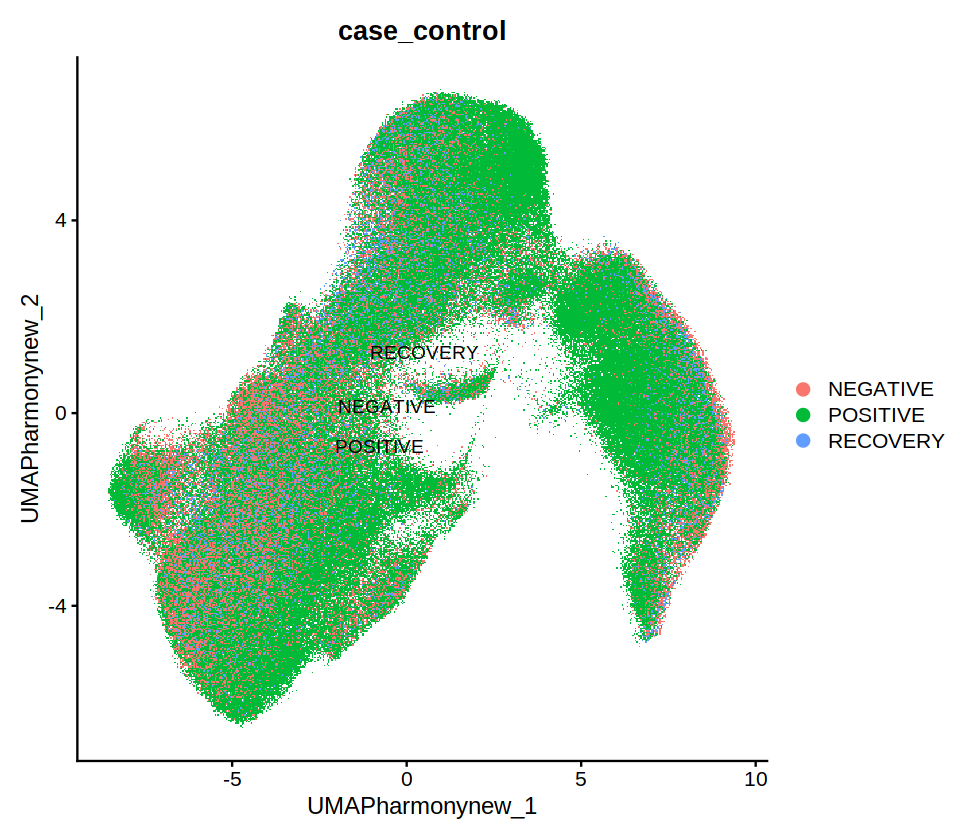

In [30]:
options(repr.plot.width=8, repr.plot.height=7)
DimPlot(object = data, label = TRUE,reduction = "umap_harmony_new",group.by="case_control")


Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



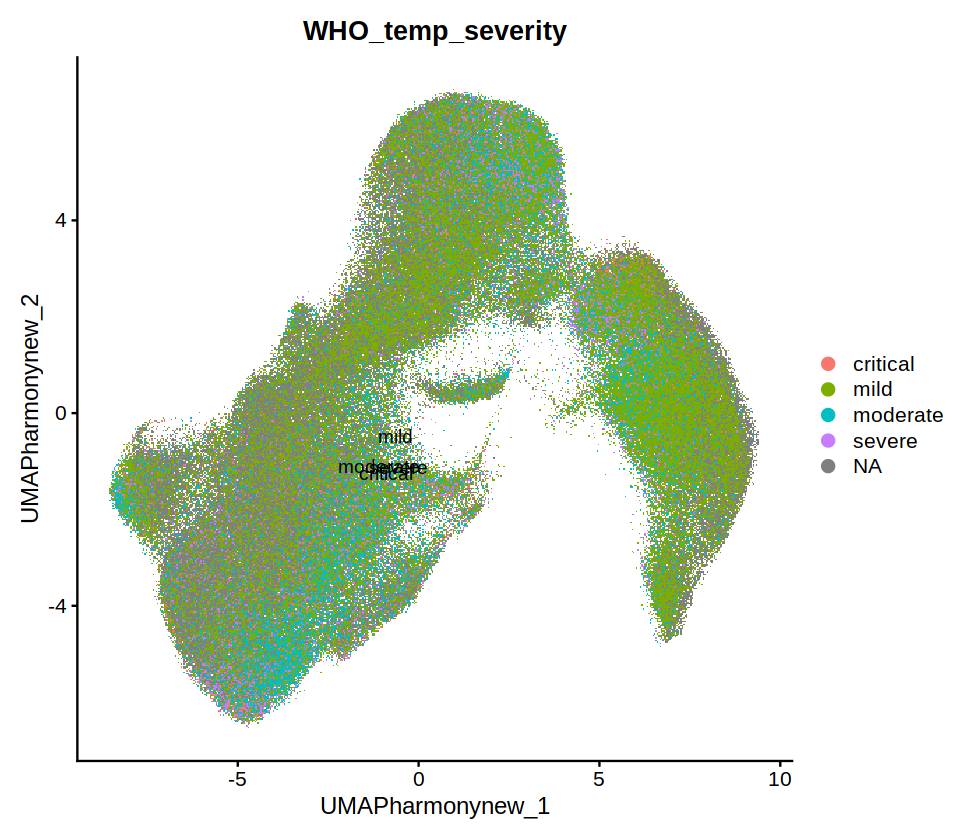

In [31]:
options(repr.plot.width=8, repr.plot.height=7)
DimPlot(object = data, label = TRUE,reduction = "umap_harmony_new",group.by="WHO_temp_severity")


In [32]:
###################
# Marker plots
###################

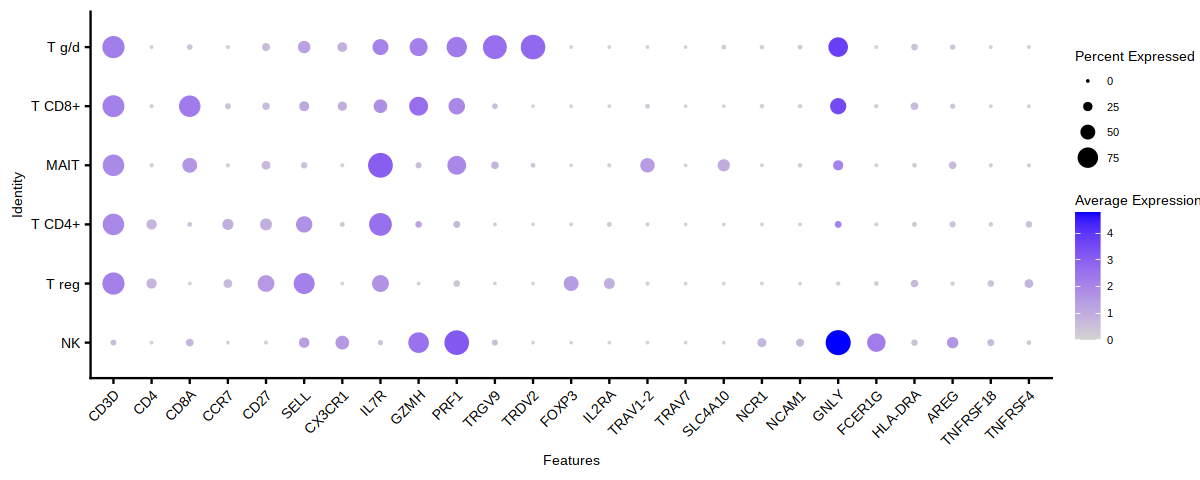

In [26]:
options(repr.plot.width=10, repr.plot.height=4)
Idents(data)<-"level_1"
DotPlot(data, features = c(
"CD3D",
"CD4",
"CD8A",
"CCR7",
"CD27",
"SELL",
"CX3CR1",
"IL7R",
"GZMH",
"PRF1",
"TRGV9",
"TRDV2",
"FOXP3",
"IL2RA",
"TRAV1-2",
"TRAV7",
"SLC4A10",
"NCR1",
"NCAM1",
"GNLY",
"FCER1G",
"HLA-DRA",
"AREG",
"TNFRSF18",
"TNFRSF4"),cluster=TRUE,scale=FALSE) + RotatedAxis() +
theme(axis.text.x=element_text(size=8),
     axis.text.y=element_text(size=8),
     axis.title=element_text(size=8),
     axis.text=element_text(size=8),
     legend.text=element_text(size=6),
     legend.title=element_text(size=8))
#ggsave("marker_dot_plot_level_1.pdf",height=3,width=8) #

In [ ]:

saveRDS(data, file = "object_for_marker_plot.rds")


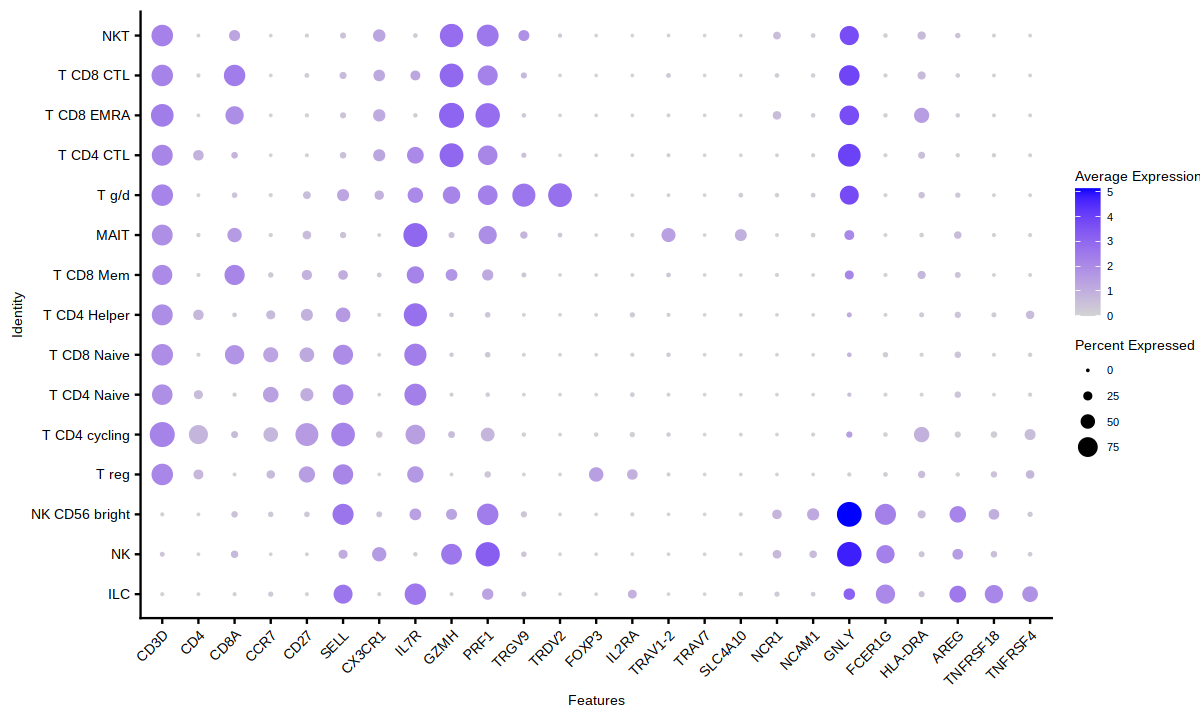

In [38]:
options(repr.plot.width=10, repr.plot.height=6)
Idents(data)<-"level_2"
DotPlot(data, features = c(
"CD3D",
"CD4",
"CD8A",
"CCR7",
"CD27",
"SELL",
"CX3CR1",
"IL7R",
"GZMH",
"PRF1",
"TRGV9",
"TRDV2",
"FOXP3",
"IL2RA",
"TRAV1-2",
"TRAV7",
"SLC4A10",
"NCR1",
"NCAM1",
"GNLY",
"FCER1G",
"HLA-DRA",
"AREG",
"TNFRSF18",
"TNFRSF4"),cluster=TRUE,scale=FALSE) + RotatedAxis()+
theme(axis.text.x=element_text(size=8),
     axis.text.y=element_text(size=8),
     axis.title=element_text(size=8),
     axis.text=element_text(size=8),
     legend.text=element_text(size=6),
     legend.title=element_text(size=8))
ggsave("marker_dot_plot_level_2.pdf",height=4,width=8) #

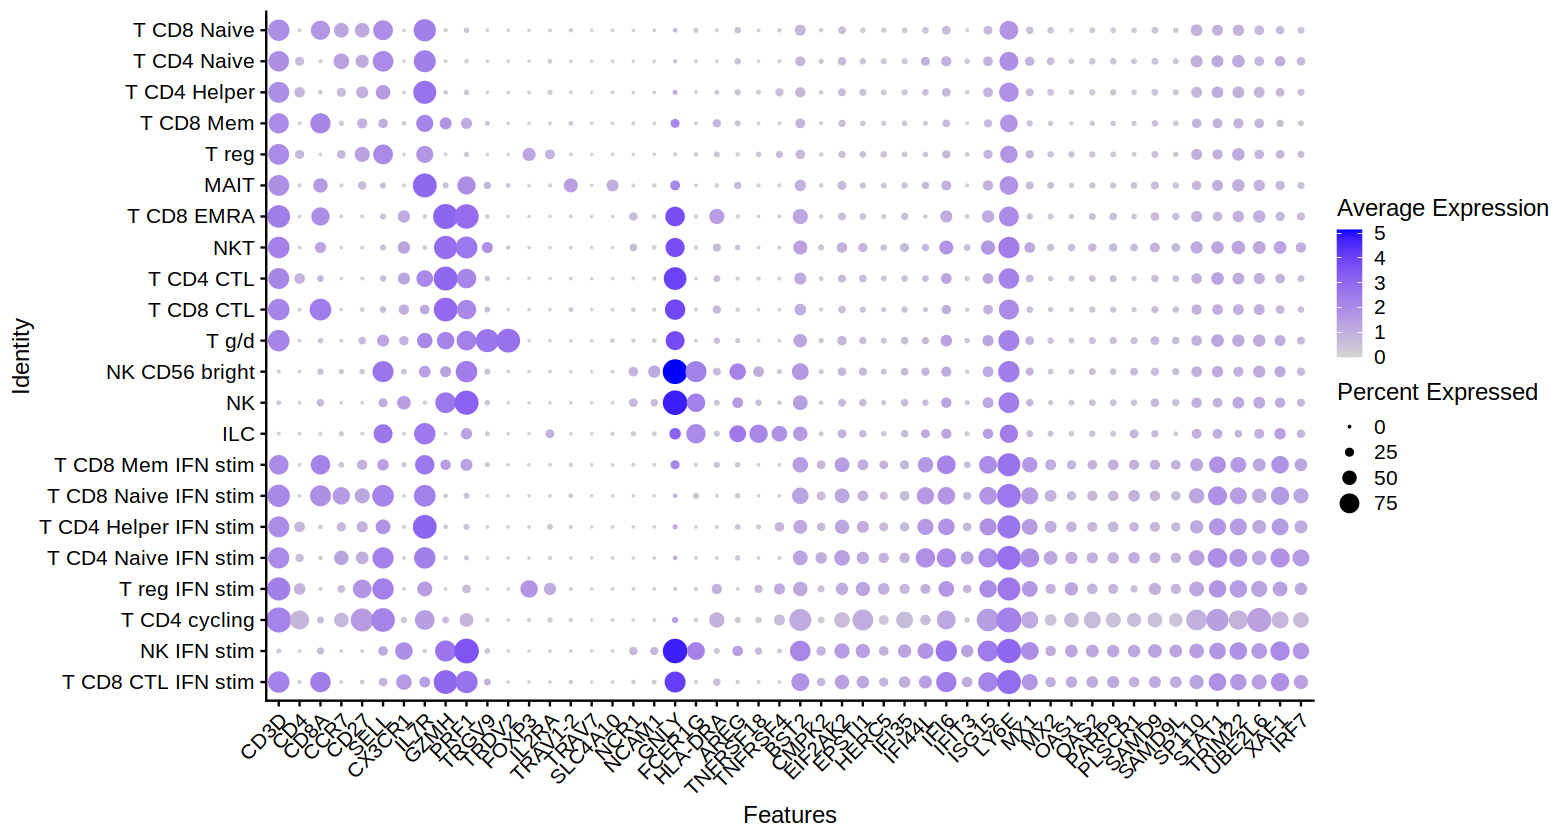

In [40]:
options(repr.plot.width=13, repr.plot.height=7)
Idents(data)<-"level_3"
DotPlot(data, features = c(
"CD3D",
"CD4",
"CD8A",
"CCR7",
"CD27",
"SELL",
"CX3CR1",
"IL7R",
"GZMH",
"PRF1",
"TRGV9",
"TRDV2",
"FOXP3",
"IL2RA",
"TRAV1-2",
"TRAV7",
"SLC4A10",
"NCR1",
"NCAM1",
"GNLY",
"FCER1G",
"HLA-DRA",
"AREG",
"TNFRSF18",
"TNFRSF4","BST2",
"CMPK2",
"EIF2AK2",
"EPSTI1",
"HERC5",
"IFI35",
"IFI44L",
"IFI6",
"IFIT3",
"ISG15",
"LY6E",
"MX1",
"MX2",
"OAS1",
"OAS2",
"PARP9",
"PLSCR1",
"SAMD9",
"SAMD9L",
"SP110",
"STAT1",
"TRIM22",
"UBE2L6",
"XAF1",
"IRF7"),cluster=TRUE,scale=FALSE) + RotatedAxis()

In [ ]:
"BST2",
"CMPK2",
"EIF2AK2",
"EPSTI1",
"HERC5",
"IFI35",
"IFI44L",
"IFI6",
"IFIT3",
"ISG15",
"LY6E",
"MX1",
"MX2",
"OAS1",
"OAS2",
"PARP9",
"PLSCR1",
"SAMD9",
"SAMD9L",
"SP110",
"STAT1",
"TRIM22",
"UBE2L6",
"XAF1",
"IRF7"

In [27]:
###################
# Marker plots ADT
###################

In [29]:
DefaultAssay(data)<-"ADT"

Warning message in FetchData.Seurat(object = object, vars = features, cells = cells):
“The following requested variables were not found: AB-CCR7, AB-PTPRC-2, AB-PTPRC-3, AB-TRGV9, AB-TRDV2, AB-TRAV1-2, AB-TRAV7, AB-GNLY, AB-FCER1G, AB-TNFRSF18”


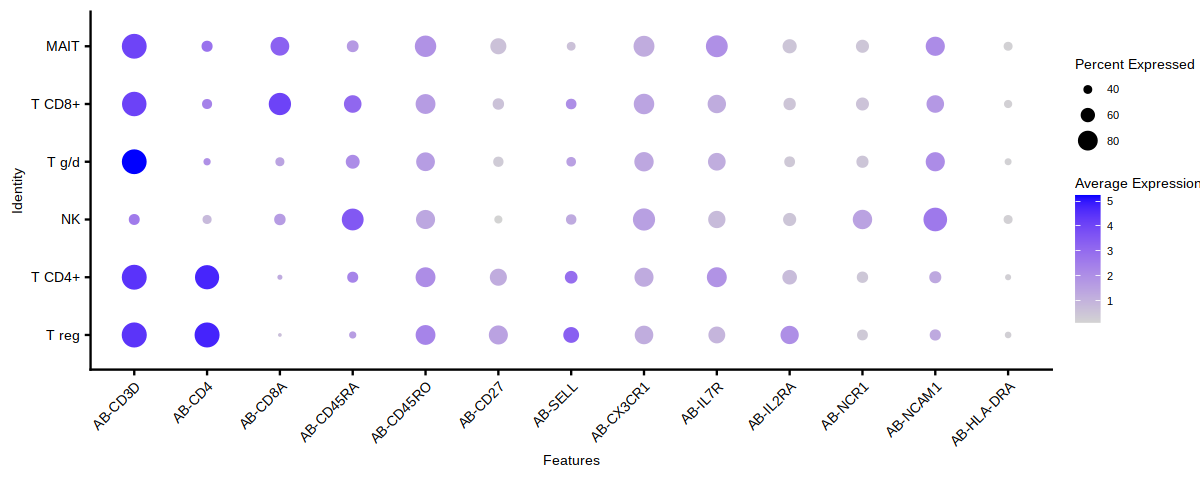

In [33]:


options(repr.plot.width=10, repr.plot.height=4)
Idents(data)<-"level_1"
DotPlot(data, features = c(
"AB-CD3D",
"AB-CD4",
"AB-CD8A",
"AB-CD45RA",
"AB-CD45RO",
"AB-CCR7",
"AB-CD27",
"AB-SELL",
"AB-CX3CR1",
"AB-IL7R",
"AB-PTPRC-2",
"AB-PTPRC-3",
"AB-TRGV9",
"AB-TRDV2",
"AB-IL2RA",
"AB-TRAV1-2",
"AB-TRAV7",
"AB-NCR1",
"AB-NCAM1",
"AB-GNLY",
"AB-FCER1G",
"AB-HLA-DRA",
"AB-TNFRSF18"),cluster=TRUE,scale=FALSE) + RotatedAxis() +
theme(axis.text.x=element_text(size=8),
     axis.text.y=element_text(size=8),
     axis.title=element_text(size=8),
     axis.text=element_text(size=8),
     legend.text=element_text(size=6),
     legend.title=element_text(size=8))
ggsave("marker_dot_plot_level_1_ADT.pdf",height=3,width=8) #

Warning message in FetchData.Seurat(object = object, vars = features, cells = cells):
“The following requested variables were not found: AB-CCR7, AB-PTPRC-2, AB-PTPRC-3, AB-TRGV9, AB-TRDV2, AB-TRAV1-2, AB-TRAV7, AB-GNLY, AB-FCER1G, AB-TNFRSF18”


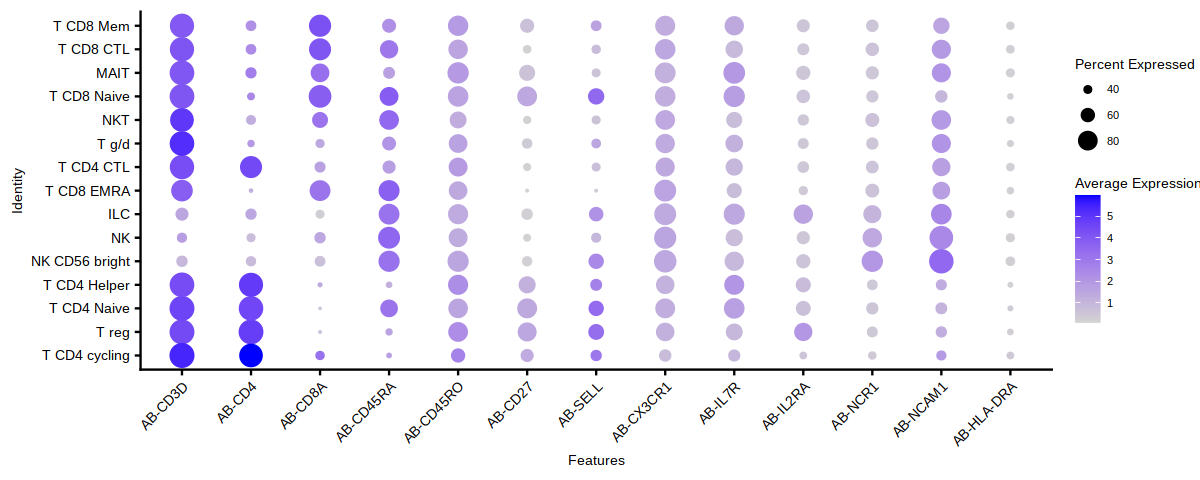

In [35]:


options(repr.plot.width=10, repr.plot.height=4)
Idents(data)<-"level_2"
DotPlot(data, features = c(
"AB-CD3D",
"AB-CD4",
"AB-CD8A",
"AB-CD45RA",
"AB-CD45RO",
"AB-CCR7",
"AB-CD27",
"AB-SELL",
"AB-CX3CR1",
"AB-IL7R",
"AB-PTPRC-2",
"AB-PTPRC-3",
"AB-TRGV9",
"AB-TRDV2",
"AB-IL2RA",
"AB-TRAV1-2",
"AB-TRAV7",
"AB-NCR1",
"AB-NCAM1",
"AB-GNLY",
"AB-FCER1G",
"AB-HLA-DRA",
"AB-TNFRSF18"),cluster=TRUE,scale=FALSE) + RotatedAxis() +
theme(axis.text.x=element_text(size=8),
     axis.text.y=element_text(size=8),
     axis.title=element_text(size=8),
     axis.text=element_text(size=8),
     legend.text=element_text(size=6),
     legend.title=element_text(size=8))
ggsave("marker_dot_plot_level_2_ADT.pdf",height=4,width=8) #